In [150]:
import requests
import json
from scipy import stats
import pandas as pd

### This code accesses Google Ngrams to compare the frequencies of two N-grams and determines whether the difference is statistically significant.

Only some corpora are supported in this version. All are 2019 versions.

Language selection:

In [235]:
corpora = {'English': 26, 
           'French': 30, 
           'German': 31,
           'Italian': 33,
           'Russian': 36,
           'Spanish': 32
          }

In [236]:
not_selected = True
while not_selected:
    print('Available languages: English, French, German, Italian, Russian, Spanish.')
    lang = input('Enter language: ')
    if lang in corpora:
        not_selected = False
    else:
        print('This language is not supported. Try again')
        

Available languages: English, French, German, Italian, Russian, Spanish.
Enter language: Russian


Time interval selection

In [258]:
not_selected = True
while not_selected:
    year_start = int(input('Enter the start year (1500-2018): '))
    if year_start < 1500 or year_start > 2018:
        print('Year out of the available interval. Try again')
    else:
        not_selected = False
        

Enter the start year (1500-2018): 1900


In [238]:
not_selected = True
while not_selected:
    year_end = int(input('Enter the end year (1501-2019): '))
    if year_end < 1501 or year_end > 2019:
        print('Year out of the available interval. Try again')
    elif year_start >= year_end:
        print('Start later than end. Try again')
    else:
        not_selected = False
        

Enter the end year (1501-2019): 2019


First N-gram

In [239]:
not_selected = True
while not_selected:
    ngram_1 = input('Entern the first N-gram. No more than 5 words. No punctuation, characters only! ')
    if  len(ngram_1.split()) > 5:
        print('N-gram too long. Try again')
    else:
        not_selected = False
        

Entern the first N-gram. No more than 5 words. No punctuation, characters only! как бы то ни было


Case sensitive?

In [240]:
not_selected = True
while not_selected:
    case_insensitive_1 = input('Do you want your search for the first N-gram to be case INSENSITIVE. Enter Y for yes or N for no: ')
    if  case_insensitive_1 != 'Y' and case_insensitive_1 != 'N':
        print('Wrong answer. Try again')
    else:
        not_selected = False
        

Do you want your search for the first N-gram to be case INSENSITIVE. Enter Y for yes or N for no: Y


Second N-gram

In [241]:
not_selected = True
while not_selected:
    ngram_2 = input('Entern the second N-gram. No more than 5 words. No punctuation, characters only! ')
    if  len(ngram_2.split()) > 5:
        print('N-gram too long. Try again')
    else:
        not_selected = False
        

Entern the second N-gram. No more than 5 words. No punctuation, characters only! как бы там ни было


Case sensitive?

In [242]:
not_selected = True
while not_selected:
    case_insensitive_2 = input('Do you want your search for the second N-gram to be case INSENSITIVE. Enter Y for yes or N for no: ')
    if  case_insensitive_2 != 'Y' and case_insensitive_2 != 'N':
        print('Wrong answer. Try again')
    else:
        not_selected = False
        

Do you want your search for the second N-gram to be case INSENSITIVE. Enter Y for yes or N for no: Y


Significance level

In [243]:
not_selected = True
while not_selected:
    alpha = float(input('Enter significance level (0 < alpha < 1). If not sure, enter 0 for the defalut value of 0.05: '))
    if alpha < 0 or alpha >= 1:
        print('Error. Enter a number between 0 and 1')
    elif alpha == 0:
        alpha = 0.05
        not_selected = False
    else:
        not_selected = False
        

Enter significance level (0 < alpha < 1). If not sure, enter 0 for the defalut value of 0.05: 0


In [259]:
params_1 = {
    'content': ngram_1,
    'year_start': year_start,
    'year_end': year_end,
    'corpus': corpora[lang],
    'smoothing': 0
}

In [260]:
if case_insensitive_1 == 'Y':
    params_1['case_insensitive'] = 'true'

In [261]:
params_2 = {
    'content': ngram_2,
    'year_start': year_start,
    'year_end': year_end,
    'corpus': corpora[lang],
    'smoothing': 0
}

In [262]:
if case_insensitive_2 == 'Y':
    params_2['case_insensitive'] = 'true'

In [263]:
result_1 = requests.get('https://books.google.com/ngrams/json?', params=params_1).json()[0]['timeseries']

In [264]:
result_2 = requests.get('https://books.google.com/ngrams/json?', params=params_2).json()[0]['timeseries']

In [265]:
compare = stats.ttest_rel(result_1, result_2)

Convert years into strings so that there are no fractional years on the plot.

In [266]:
year_range = [str(year) for year in range(year_start, year_end + 1)]

In [267]:
result = pd.DataFrame({ngram_1: result_1, ngram_2: result_2},
                     index = year_range)
result

,как бы то ни было,как бы там ни было
1900,7.370542e-07,7.624698e-08
1901,3.771644e-07,0.000000e+00
1902,7.281546e-07,4.854364e-08
1903,5.279377e-07,1.147691e-07
1904,6.867585e-07,2.081086e-08
...,...,...
2015,6.749654e-06,2.304369e-06
2016,7.123640e-06,2.601869e-06
2017,6.311109e-06,2.935301e-06
2018,6.041098e-06,3.217568e-06


In [268]:
if compare.statistic >= 0:
    more_common = ngram_1
    less_common = ngram_2
else:
    more_common = ngram_2
    less_common = ngram_1    

In [269]:
if compare.pvalue < alpha:
    significance = 'and the difference is statistically significant'
else:
    significance = 'but the difference is not statistically significant'


In [270]:
outcome = 'N-gram "{0}" is more common than n-gram "{1}", {2} (p-value = {3})'.format(more_common, 
                                                                                less_common, 
                                                                                significance, 
                                                                                compare.pvalue)

In [271]:
print(outcome)

N-gram "как бы то ни было" is more common than n-gram "как бы там ни было", and the difference is statistically significant (p-value = 1.2495379708855416e-32)


<AxesSubplot:xlabel='year', ylabel='frequency'>

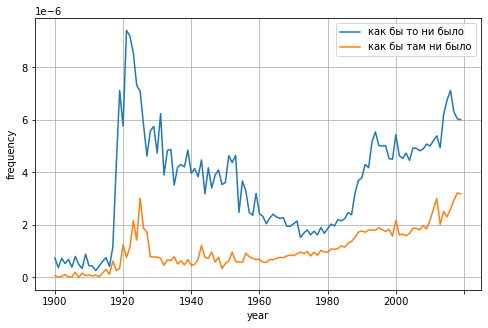

In [272]:
result.plot.line(
                grid=True,
                xlabel='year',
                ylabel='frequency',
                 figsize = (8, 5)
                )